# Final Project EDA

`Due Date: February 22, 2024`

- Bachas-Daunert, Philip  
- Mason, Dylan

## Loading in Dataset from Kaggle API

In [ ]:
import os
import pandas as pd
from opendatasets import download  # Ensure opendatasets is installed for this script to work.

# Constants are typically defined at the top of the script.
DATASET_URL = "https://www.kaggle.com/datasets/uciml/restaurant-data-with-consumer-ratings"
DATA_DIR = "restaurant-data-with-consumer-ratings"


def dataset_exists(data_dir):
    """
    Check if the specified dataset directory exists and contains the necessary CSV files.

    Parameters:
    - data_dir (str): The directory where the dataset is expected to be found.

    Returns:
    - bool: True if the dataset exists and contains the required CSV files, False otherwise.
    """
    if not os.path.exists(data_dir) or not os.listdir(data_dir):
        return False

    required_files = {'geoplaces2.csv', 'rating_final.csv', 'userprofile.csv'}
    found_files = {file for file in os.listdir(data_dir) if file.endswith('.csv')}

    return required_files.issubset(found_files)


def download_and_extract(dataset_url, data_dir):
    """
    Downloads and extracts the dataset unless it already exists in the specified directory.

    Parameters:
    - dataset_url (str): URL of the dataset to download.
    - data_dir (str): Directory to download and extract the dataset to.
    """
    if not dataset_exists(data_dir):
        print("Dataset not found. Initiating download and extraction...")
        download(dataset_url, data_dir)  # This function downloads the dataset from the given URL.
        # Extraction logic is not required here as 'download' handles extraction for Kaggle datasets.
        print("Download and extraction complete.")
    else:
        print("Dataset already exists. Skipping download.")


def load_data(data_path):
    """
    Loads CSV files into pandas DataFrames.

    Parameters:
    - data_path (str): The path to the directory containing the CSV files.

    Returns:
    - dict: A dictionary of DataFrames keyed by their respective file names without extension.
    """
    target_files = ['geoplaces2.csv', 'rating_final.csv', 'userprofile.csv']
    dataframes = {}

    for filename in target_files:
        filepath = os.path.join(data_path, filename)
        df_name = "df_" + os.path.splitext(filename)[0]  # Create a DataFrame name.

        if os.path.exists(filepath):
            dataframes[df_name] = pd.read_csv(filepath)
            print(f"DataFrame '{df_name}' loaded successfully.")
        else:
            dataframes[df_name] = None
            print(f"Warning: File '{filename}' not found in the specified directory.")

    return dataframes


if __name__ == "__main__":
    download_and_extract(DATASET_URL, DATA_DIR)
    dataframes = load_data(DATA_DIR)

    # Check for loading errors and report them.
    for df_name, df in dataframes.items():
        if df is None:
            print(f"Error: DataFrame '{df_name}' could not be loaded.")


## Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

def calculate_outlier_bounds(df: pd.DataFrame, column: str) -> tuple:
    """
    Calculates lower and upper bounds for outliers in a numeric column.

    Parameters:
    - df: DataFrame to analyze.
    - column: Column name of numeric data.

    Returns:
    - A tuple containing lower and upper bounds for outliers.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

def print_outlier_analysis(df: pd.DataFrame):
    """
    Prints outlier analysis for numeric columns in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    numeric_columns = df.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        lower_bound, upper_bound = calculate_outlier_bounds(df, column)
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"\nOutlier Analysis for {column}:")
        print(f"Detected outliers: {len(outliers)}" if not outliers.empty else "No outliers detected.")

def print_basic_info(df: pd.DataFrame):
    """
    Prints basic information about the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print("Basic Information:")
    print(f"Shape: {df.shape}")
    print("Data Types:")
    print(tabulate(pd.DataFrame(df.dtypes, columns=['Type']),
                   headers='keys', tablefmt='psql'))

def print_descriptive_statistics(df: pd.DataFrame):
    """
    Prints descriptive statistics for numeric columns in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print("\nDescriptive Statistics:")
    print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

def print_missing_values(df: pd.DataFrame):
    """
    Prints a summary of missing values in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(tabulate(pd.DataFrame(missing_values, columns=['Missing Values']),
                   headers='keys', tablefmt='psql'))

def print_value_counts(df: pd.DataFrame):
    """
    Prints value counts for non-numeric columns in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns
    for column in non_numeric_columns:
        print(f"\nValue Counts for {column}:")
        print(tabulate(pd.DataFrame(df[column].value_counts()),
                       headers='keys', tablefmt='psql'))

def print_correlation_analysis(df: pd.DataFrame):
    """
    Prints a correlation matrix for numeric columns in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    if numeric_df.empty:
        print("No numeric columns available for correlation analysis.")
        return

    print("\nCorrelation Analysis:")
    correlation_matrix = numeric_df.corr()
    print(tabulate(correlation_matrix, headers='keys', tablefmt='psql', floatfmt=".2f"))

def print_unique_values_count(df: pd.DataFrame):
    """
    Prints the count of unique values for each column in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print("\nUnique Values Count:")
    unique_counts = pd.DataFrame(df.nunique(), columns=['Unique Values'])
    print(tabulate(unique_counts, headers='keys', tablefmt='psql'))

def print_duplicated_records(df: pd.DataFrame):
    """
    Checks and prints the number of duplicated records in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print("\nDuplicated Records Check:")
    duplicated_count = df.duplicated().sum()
    print(f"Number of duplicated rows: {duplicated_count}")

def print_column_value_range(df: pd.DataFrame):
    """
    Prints the range (min, max) of values for numeric columns in the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print("\nColumn Value Range:")
    numeric_columns = df.select_dtypes(include=['number']).columns
    range_df = pd.DataFrame([(df[column].min(), df[column].max())
                             for column in numeric_columns],
                            index=numeric_columns, columns=['Min', 'Max'])
    print(tabulate(range_df, headers='keys', tablefmt='psql', floatfmt=".2f"))

def summarize_dataframe(df: pd.DataFrame):
    """
    Prints a comprehensive summary analysis of the DataFrame.

    Parameters:
    - df: DataFrame to analyze.
    """
    print_basic_info(df)
    print_descriptive_statistics(df)
    print_missing_values(df)
    print_value_counts(df)
    print_outlier_analysis(df)
    print_correlation_analysis(df)
    print_unique_values_count(df)
    print_duplicated_records(df)
    print_column_value_range(df)

def perform_eda(dataframes: dict):
    """
    Performs exploratory data analysis (EDA) on a collection of DataFrames.

    Parameters:
    - dataframes: A dictionary of DataFrame objects to analyze, where keys are
      names/identifiers of the DataFrames.
    """
    for name, df in dataframes.items():
        print(f"\n{'='*40}\nEDA Summary for DataFrame: {name}\n{'='*40}")
        # Clean the DataFrame first
        df_cleaned = clean_data(df)
        summarize_dataframe(df_cleaned)

# Assuming 'dataframes' is your dictionary of DataFrames
perform_eda(dataframes)



EDA Summary for DataFrame: df_geoplaces2
Basic Information:
Shape: (130, 21)
Data Types:
+----------------+---------+
|                | Type    |
|----------------+---------|
| placeID        | int64   |
| latitude       | float64 |
| longitude      | float64 |
| the_geom_meter | object  |
| name           | object  |
| address        | object  |
| city           | object  |
| state          | object  |
| country        | object  |
| fax            | object  |
| zip            | object  |
| alcohol        | object  |
| smoking_area   | object  |
| dress_code     | object  |
| accessibility  | object  |
| price          | object  |
| url            | object  |
| Rambience      | object  |
| franchise      | object  |
| area           | object  |
| other_services | object  |
+----------------+---------+

Descriptive Statistics:
+-------+-----------+------------+-------------+
|       |   placeID |   latitude |   longitude |
|-------+-----------+------------+-------------|
| count |    

In [ ]:
import pandas as pd

# Data Transformation and Merging

# Extract individual DataFrames from the 'dataframes' dictionary for easier manipulation.
df_geoplaces2 = dataframes['df_geoplaces2']
df_rating_final = dataframes['df_rating_final']
df_userprofile = dataframes['df_userprofile']

# Drop unnecessary columns from the user profile DataFrame.
# These columns are not needed for the subsequent analysis.
df_userprofile.drop(
    columns=[
        'longitude', 'latitude', 'smoker', 'height', 'weight',
        'color', 'religion', 'hijos', 'activity'
    ],
    inplace=True
)

# Retain only 'placeID' and 'name' columns in the geoplaces2 DataFrame.
# Simplifies the DataFrame for easier merging with other DataFrames.
df_geoplaces2_simplified = df_geoplaces2[['placeID', 'name']]

# Merge 'df_userprofile' and 'df_rating_final' using a right join.
# This operation combines user profile information with their corresponding ratings.
data_merged = pd.merge(
    df_userprofile,
    df_rating_final,
    on='userID',
    how='right'
)

# Create a new column 'sum_rating' that aggregates ratings from different categories.
# This column sums up the 'rating', 'food_rating', and 'service_rating' columns.
data_merged['sum_rating'] = (
    data_merged['rating'] +
    data_merged['food_rating'] +
    data_merged['service_rating']
)

# Merge the aggregated data with the simplified geoplaces2 DataFrame.
# This operation adds place information to the user ratings and profiles.
data_final = pd.merge(
    data_merged,
    df_geoplaces2_simplified,
    on='placeID',
    how='left'
)

# Inspect the first few rows of the final merged DataFrame to ensure correctness.
print(data_final.head())


  userID     drink_level dress_preference ambience transport marital_status  \
0  U1077  social drinker          elegant   family    public        married   
1  U1077  social drinker          elegant   family    public        married   
2  U1077  social drinker          elegant   family    public        married   
3  U1077  social drinker          elegant   family    public        married   
4  U1068  casual drinker         informal  friends    public         single   

   birth_year    interest        personality  budget  placeID  rating  \
0        1987  technology  thrifty-protector  medium   135085       2   
1        1987  technology  thrifty-protector  medium   135038       2   
2        1987  technology  thrifty-protector  medium   132825       2   
3        1987  technology  thrifty-protector  medium   135060       1   
4        1988  technology  thrifty-protector     low   135104       1   

   food_rating  service_rating  sum_rating                     name  
0            2  

In [ ]:
import pandas as pd

def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the given DataFrame.

    Implement cleaning steps like handling missing values, standardizing text, etc., here.

    Parameters:
    - df: The DataFrame to clean.

    Returns:
    - A cleaned DataFrame.
    """
    # Example cleaning step: fill in missing values with the mean for numerical columns
    # and with the mode for categorical columns.
    for col in df.select_dtypes(include=['float64', 'int64']):
        df[col].fillna(df[col].mean(), inplace=True)
    for col in df.select_dtypes(include=['object', 'category']):
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

def summarize_dataframe(df: pd.DataFrame):
    """
    Summarizes the given DataFrame by printing its shape, data types, missing values, etc.

    Parameters:
    - df: The DataFrame to summarize.
    """
    # Print the shape of the DataFrame
    print(f"Shape: {df.shape}\n")

    # Data types
    print("Data Types:")
    print(df.dtypes, "\n")

    # Missing values
    print("Missing Values:")
    print(df.isnull().sum(), "\n")

    # Descriptive statistics for numerical columns
    print("Descriptive Statistics:")
    print(df.describe(), "\n")

def perform_eda_single(df: pd.DataFrame, df_name: str = "DataFrame"):
    """
    Performs exploratory data analysis (EDA) on a single DataFrame.

    Parameters:
    - df: The DataFrame object to analyze.
    - df_name: A name/identifier for the DataFrame, used for printing purposes.
    """
    print(f"\n{'='*40}\nEDA Summary for {df_name}\n{'='*40}")
    df_cleaned = clean_data(df)
    summarize_dataframe(df_cleaned)


perform_eda_single(data_final)



EDA Summary for DataFrame
Shape: (1161, 16)

Data Types:
userID              object
drink_level         object
dress_preference    object
ambience            object
transport           object
marital_status      object
birth_year           int64
interest            object
personality         object
budget              object
placeID              int64
rating               int64
food_rating          int64
service_rating       int64
sum_rating           int64
name                object
dtype: object 

Missing Values:
userID              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
birth_year          0
interest            0
personality         0
budget              0
placeID             0
rating              0
food_rating         0
service_rating      0
sum_rating          0
name                0
dtype: int64 

Descriptive Statistics:
        birth_year        placeID       rating  food_rating  service_rating  \
count  1

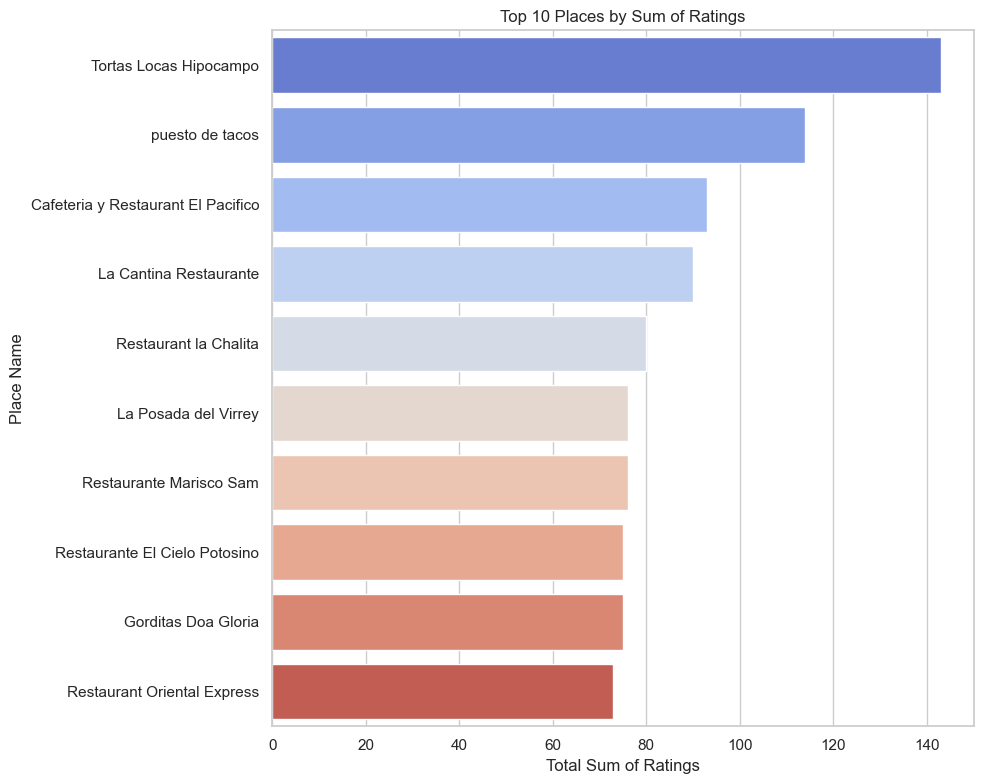

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting setup for a nicer theme using seaborn
sns.set_theme(style="whitegrid")

# Creating a visualization from 'data_final'
# For the sake of example, let's assume we are visualizing the sum of ratings for each place.
# This requires grouping the data by 'name' (place name) and summing up 'sum_rating'.

# Grouping data by place name and calculating the total sum_rating for each place.
place_ratings_sum = data_final.groupby('name')['sum_rating'].sum().reset_index()

# Sorting places by the total sum_rating to identify top-rated places.
place_ratings_sum_sorted = place_ratings_sum.sort_values(by='sum_rating', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))  # Setting the figure size for better readability.
sns.barplot(
    x='sum_rating',
    y='name',
    data=place_ratings_sum_sorted.head(10),  # Displaying only the top 10 places for clarity.
    palette='coolwarm'  # Choosing a visually appealing color palette.
)
plt.title('Top 10 Places by Sum of Ratings')  # Adding a title to the plot.
plt.xlabel('Total Sum of Ratings')  # Naming the x-axis.
plt.ylabel('Place Name')  # Naming the y-axis.
plt.tight_layout()  # Adjusting subplots to fit into the figure area.
plt.show()  # Displaying the plot.


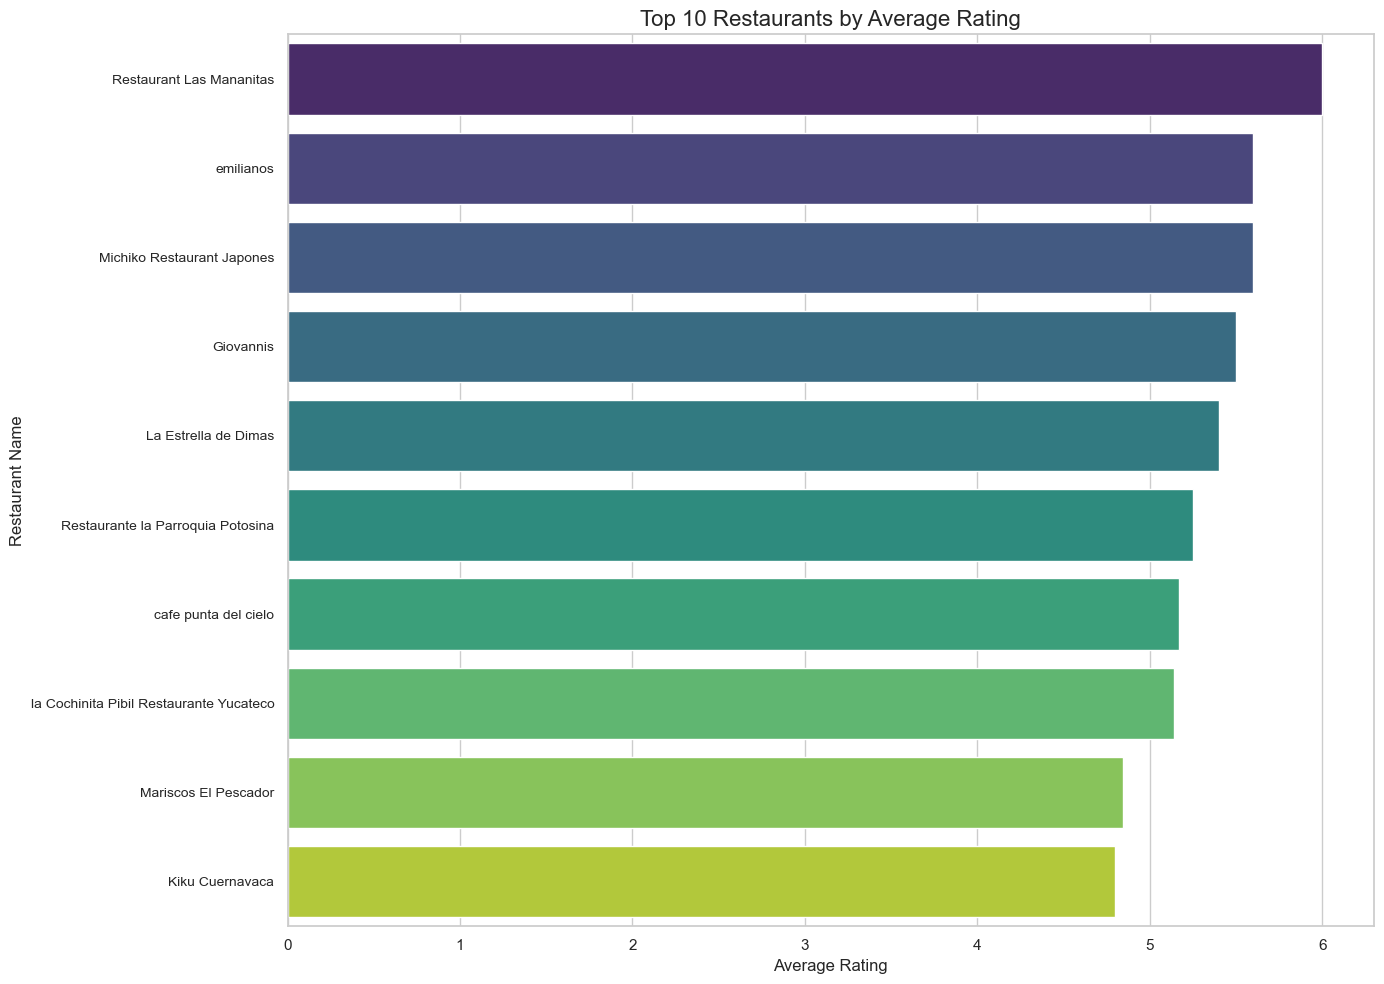

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot.
sns.set_theme(style="whitegrid")

# Compute the mean ratings by place.
mean_ratings_by_place = (
    data_final.groupby('placeID')['sum_rating']
    .mean()
    .reset_index()
    .rename(columns={'sum_rating': 'average_rating'})
)

# Add restaurant names to the mean_ratings DataFrame.
# This assumes that each 'placeID' corresponds to a unique restaurant name.
mean_ratings_with_names = (
    mean_ratings_by_place
    .merge(data_final[['placeID', 'name']].drop_duplicates(), on='placeID')
)

# Sort the data by average ratings in descending order.
mean_ratings_with_names_sorted = (
    mean_ratings_with_names
    .sort_values(by='average_rating', ascending=False)
)

# Select the top N for plotting to avoid clutter.
top_n = 10  # Adjust top_n based on how many you wish to display.

# Define the figure size.
plt.figure(figsize=(14, 10))  # Larger figure size for readability.

# Create a horizontal bar plot.
sns.barplot(
    x='average_rating',
    y='name',
    data=mean_ratings_with_names_sorted.head(top_n),
    palette='viridis',
    orient='h'  # Horizontal bars to accommodate names.
)

# Set the plot aesthetics.
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.title('Top 10 Restaurants by Average Rating', fontsize=16)
plt.yticks(fontsize=10)  # Smaller font size for y-axis ticks.
plt.tight_layout()

# Show the plot.
plt.show()


Mean Atmosphere Rating: 1.20


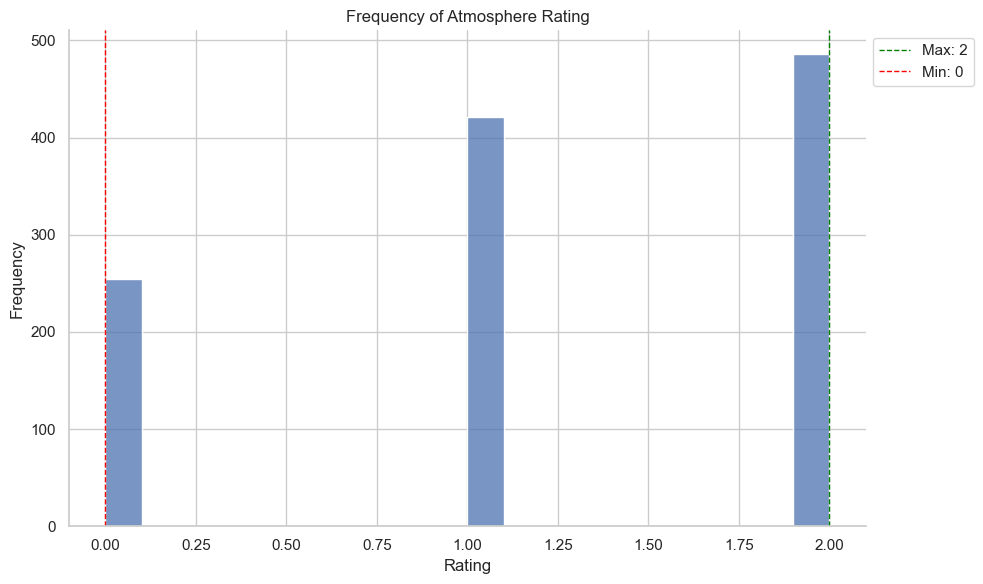

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.lines as mlines

# Suppress specific FutureWarnings from seaborn that we know are safe to ignore.
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming 'data_final' is a pandas DataFrame containing the 'rating' column.
sns.set_theme(style="whitegrid")

# Plotting the histogram of the atmosphere ratings.
plt.figure(figsize=(10, 6))
sns.histplot(data_final['rating'], bins=20, kde=False)

plt.title('Frequency of Atmosphere Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

# Calculate and print the mean atmosphere rating, formatted to 2 decimal places.
mean_atmosphere_rating = data_final['rating'].mean()
print(f"Mean Atmosphere Rating: {mean_atmosphere_rating:.2f}")

# Calculate the max and min ratings from the dataset.
max_rating = data_final['rating'].max()
min_rating = data_final['rating'].min()

# Add vertical lines for max and min ratings.
plt.axvline(x=max_rating, color='green', linestyle='--', linewidth=1, label=f'Max: {max_rating}')
plt.axvline(x=min_rating, color='red', linestyle='--', linewidth=1, label=f'Min: {min_rating}')

# Create custom legend items for the max and min ratings.
green_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=1, label=f'Max: {max_rating}')
red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=1, label=f'Min: {min_rating}')

# Add the legend to the plot, placing it outside the plot area on the right.
plt.legend(handles=[green_line, red_line], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the legend if needed.

# Show the plot.
plt.show()


Mean Sum Rating: 3.51


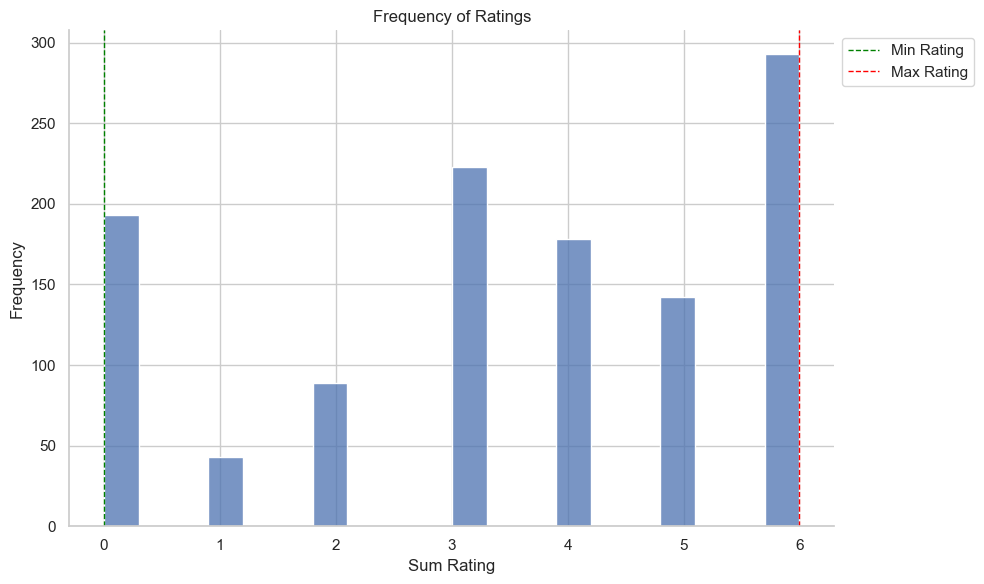

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Set the style for the plot using seaborn for improved aesthetics.
sns.set_theme(style="whitegrid")

# Plotting the histogram of the sum ratings using seaborn for a nicer histogram.
plt.figure(figsize=(10, 6))  # Define the figure size for better readability.
sns.histplot(data_final['sum_rating'], bins=20, kde=False)

# Customize the appearance of the plot.
plt.title('Frequency of Ratings')  # Adding a title to the histogram.
plt.xlabel('Sum Rating')  # Label for the x-axis.
plt.ylabel('Frequency')  # Label for the y-axis.
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines to clean up the plot.

# Calculate the mean sum rating.
mean_sum_rating = data_final['sum_rating'].mean()
print(f"Mean Sum Rating: {mean_sum_rating:.2f}")

# Annotate the minimum and maximum possible sum ratings on the plot.
min_rating = data_final['sum_rating'].min()
max_rating = data_final['sum_rating'].max()
plt.axvline(min_rating, color='green', linestyle='dashed', linewidth=1, label='Min Rating')
plt.axvline(max_rating, color='red', linestyle='dashed', linewidth=1, label='Max Rating')

# Create custom legend items.
green_line = mlines.Line2D([], [], color='green', linestyle='dashed', linewidth=1, label='Min Rating')
red_line = mlines.Line2D([], [], color='red', linestyle='dashed', linewidth=1, label='Max Rating')

# Add the legend to the plot. Placing it outside the plot area on the right.
plt.legend(handles=[green_line, red_line], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the legend if needed.

# Show the plot.
plt.show()


Mean Food Rating: 1.22


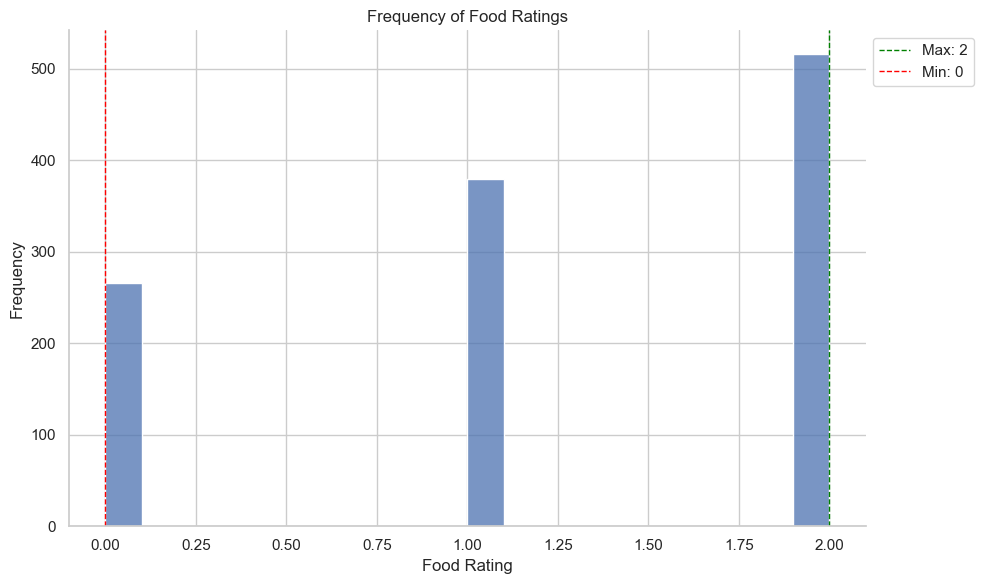

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Assuming 'data_final' is a pandas DataFrame containing the 'food_rating' column.

# Set the style for the plot using seaborn for improved aesthetics.
sns.set_theme(style="whitegrid")

# Plotting the histogram of the food ratings.
plt.figure(figsize=(10, 6))  # Define the figure size for better readability.
sns.histplot(data_final['food_rating'], bins=20, kde=False)  # Use seaborn's histplot for the histogram.

# Customize the appearance of the plot.
plt.title('Frequency of Food Ratings')  # Adding a title to the plot.
plt.xlabel('Food Rating')  # Label for the x-axis.
plt.ylabel('Frequency')  # Label for the y-axis.
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines.

# Calculate the mean food rating and format it to two decimal places.
mean_food_rating = data_final['food_rating'].mean()
print(f"Mean Food Rating: {mean_food_rating:.2f}")

# Calculate the max and min food ratings from the dataset.
max_rating = data_final['food_rating'].max()
min_rating = data_final['food_rating'].min()

# Add vertical lines for max and min ratings.
plt.axvline(x=max_rating, color='green', linestyle='--', linewidth=1, label=f'Max: {max_rating}')
plt.axvline(x=min_rating, color='red', linestyle='--', linewidth=1, label=f'Min: {min_rating}')

# Create custom legend items for the max and min ratings.
green_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=1, label=f'Max: {max_rating}')
red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=1, label=f'Min: {min_rating}')

# Add the legend to the plot, placing it outside the plot area on the right.
plt.legend(handles=[green_line, red_line], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the legend if needed.

# Show the plot.
plt.show()


Mean Service Rating: 1.09


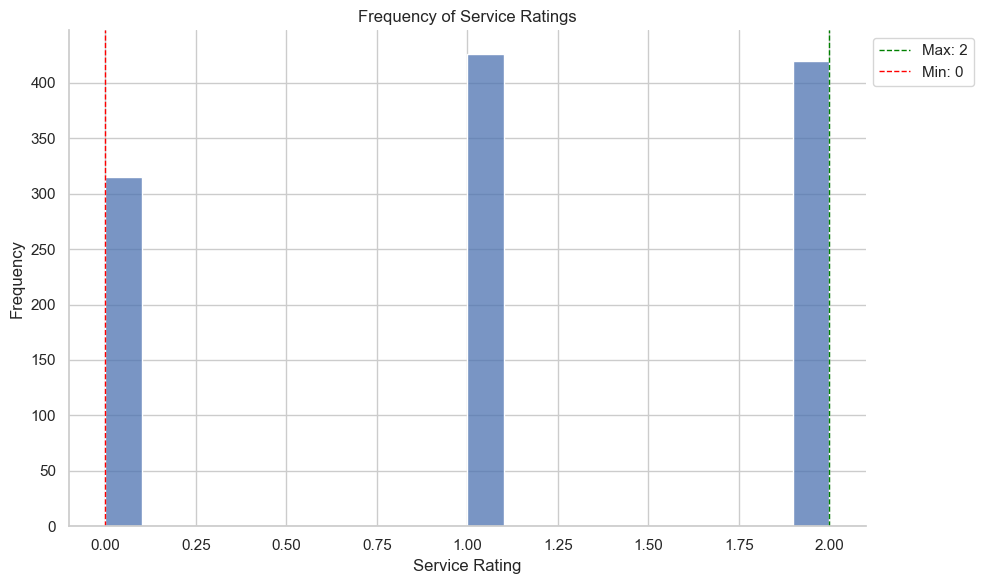

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Assuming 'data_final' is a pandas DataFrame that includes a 'service_rating' column.

# Set the Seaborn theme for nicer visuals.
sns.set_theme(style="whitegrid")

# Plotting the histogram of the service ratings using Seaborn for a consistent theme.
plt.figure(figsize=(10, 6))  # Define the figure size for better readability.
sns.histplot(data_final['service_rating'], bins=20, kde=False)  # Use Seaborn's histplot.

# Customize the plot appearance.
plt.title('Frequency of Service Ratings')  # Adding a title.
plt.xlabel('Service Rating')  # Label for the x-axis.
plt.ylabel('Frequency')  # Label for the y-axis.
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines to clean up the plot edges.

# Calculate the mean service rating and format it to two decimal places.
mean_service_rating = data_final['service_rating'].mean()
print(f"Mean Service Rating: {mean_service_rating:.2f}")

# Calculate the max and min service ratings from the dataset.
max_rating = data_final['service_rating'].max()
min_rating = data_final['service_rating'].min()

# Add vertical lines for max and min ratings.
plt.axvline(x=max_rating, color='green', linestyle='--', linewidth=1, label=f'Max: {max_rating}')
plt.axvline(x=min_rating, color='red', linestyle='--', linewidth=1, label=f'Min: {min_rating}')

# Create custom legend items for the max and min ratings.
green_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=1, label=f'Max: {max_rating}')
red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=1, label=f'Min: {min_rating}')

# Add the legend to the plot, placing it outside the plot area on the right.
plt.legend(handles=[green_line, red_line], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the legend if needed.

# Display the plot.
plt.show()


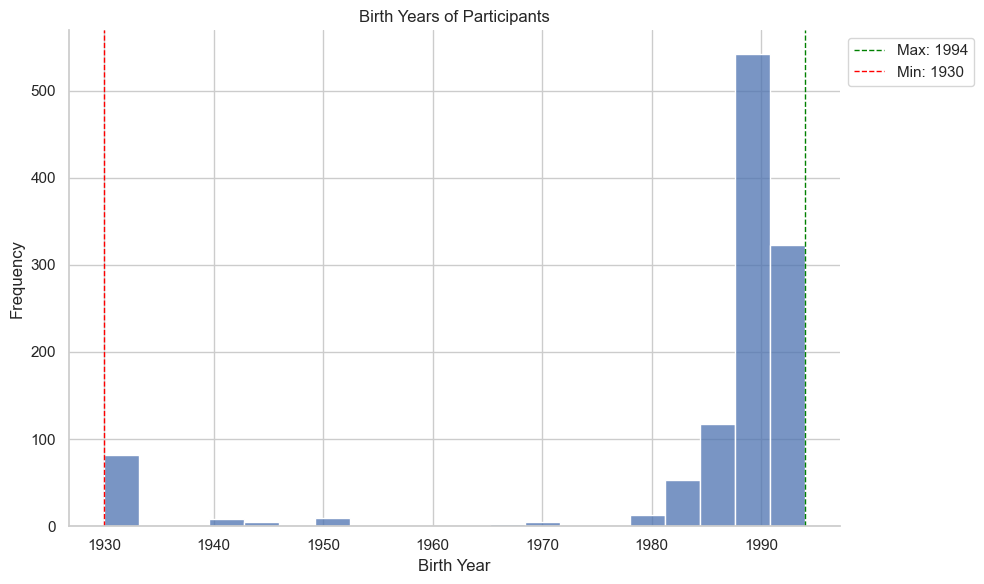

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

# Assuming 'data_final' is a pandas DataFrame containing the 'birth_year' column.

# Set the style for the plot using seaborn for improved aesthetics.
sns.set_theme(style="whitegrid")

# Plotting the histogram of birth years.
plt.figure(figsize=(10, 6))  # Define the figure size for better readability.
sns.histplot(data_final['birth_year'], bins=20, kde=False)  # Use seaborn's histplot for the histogram.

# Customize the appearance of the plot.
plt.title('Birth Years of Participants')  # Adding a title to the plot.
plt.xlabel('Birth Year')  # Label for the x-axis.
plt.ylabel('Frequency')  # Label for the y-axis.
plt.gca().spines[['top', 'right']].set_visible(False)  # Hide the top and right spines.

# Calculate the max and min birth years from the dataset.
max_birth_year = data_final['birth_year'].max()
min_birth_year = data_final['birth_year'].min()

# Add vertical lines for max and min birth years.
plt.axvline(x=max_birth_year, color='green', linestyle='--', linewidth=1, label=f'Max: {max_birth_year}')
plt.axvline(x=min_birth_year, color='red', linestyle='--', linewidth=1, label=f'Min: {min_birth_year}')

# Create custom legend items for the max and min birth years.
green_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=1, label=f'Max: {max_birth_year}')
red_line = mlines.Line2D([], [], color='red', linestyle='--', linewidth=1, label=f'Min: {min_birth_year}')

# Add the legend to the plot, placing it outside the plot area on the right.
plt.legend(handles=[green_line, red_line], loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Adjust layout to make room for the legend if needed.

# Show the plot.
plt.show()


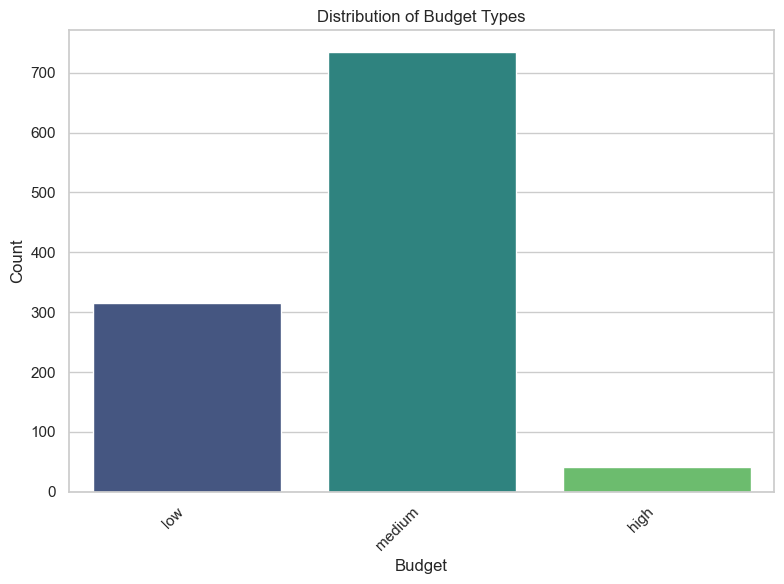

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Importing for data manipulation and handling NaN values.

# Assuming 'data_final' is a pandas DataFrame containing the 'budget' column.

# Replace '?' with NaN values to clean the data.
data_final['budget'] = data_final['budget'].replace('?', pd.NA)

# Exclude rows with NA values in the 'budget' column to focus on complete data.
data_cleaned = data_final.dropna(subset=['budget'])

# Set the style for the plot using seaborn for improved aesthetics.
sns.set_theme(style="whitegrid")

# Plotting a count plot for the 'budget' column with ordered categories.
plt.figure(figsize=(8, 6))
sns.countplot(
    x='budget',
    data=data_cleaned,
    order=['low', 'medium', 'high'],
    palette='viridis'
)

# Customize the appearance of the plot.
plt.xlabel('Budget')  # Label for the x-axis.
plt.ylabel('Count')  # Label for the y-axis.
plt.title('Distribution of Budget Types')  # Adding a title to the plot.
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability.

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()


## Data Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD
from surprise.accuracy import rmse

# Read the data into a Surprise dataset
reader = Reader(rating_scale = (0, 6))
data_train = Dataset.load_from_df(train_data[['userID',	'placeID',	'sum_rating']], reader)
data_test = Dataset.load_from_df(test_data[['userID',	'placeID',	'sum_rating']], reader)



EDA Summary for Training Data
Shape: (928, 16)

Data Types:
userID              object
drink_level         object
dress_preference    object
ambience            object
transport           object
marital_status      object
birth_year           int64
interest            object
personality         object
budget              object
placeID              int64
rating               int64
food_rating          int64
service_rating       int64
sum_rating           int64
name                object
dtype: object 

Missing Values:
userID              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
birth_year          0
interest            0
personality         0
budget              0
placeID             0
rating              0
food_rating         0
service_rating      0
sum_rating          0
name                0
dtype: int64 

Descriptive Statistics:
        birth_year        placeID      rating  food_rating  service_rating  \
count 

In [ ]:
# Build full trainset
data_train = data_train.build_full_trainset()
data_test = data_test.build_full_trainset()

RMSE: 1.9912
Test RMSE: 1.99


In [ ]:
mean = data_train.global_mean
print('Train rating', mean)

In [ ]:
mean = data_test.global_mean
print('Test rating', mean)

In [ ]:
# Create the trainset and testset
data_trainset = data_train.build_testset()
data_testset = data_test.build_testset()

## Model Training and Evaluation

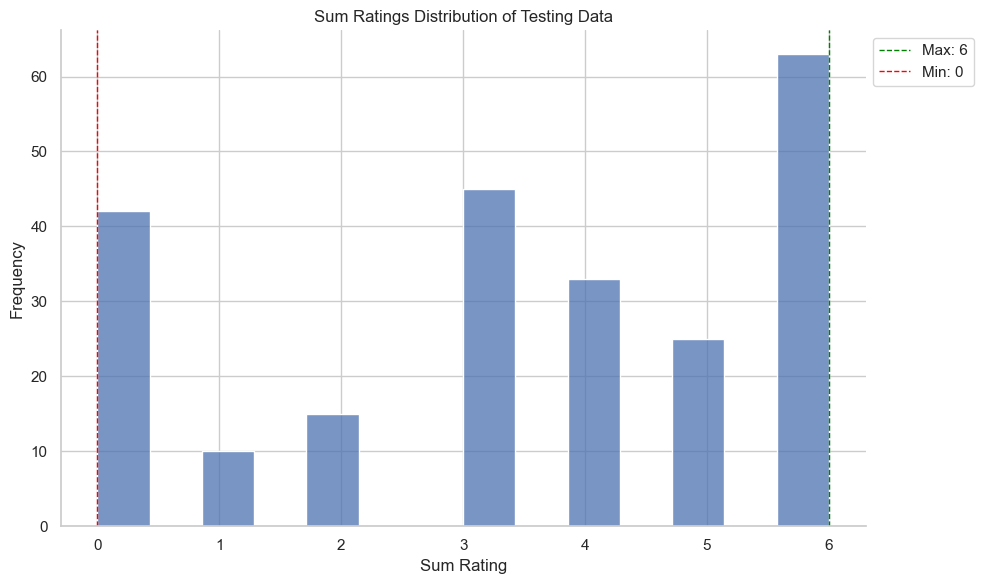

In [ ]:
# Create SVD algorithm with 5 factors
k_factors = 5
algo = SVD(n_factors= k_factors, n_epochs= 200, lr_all= 0.005, reg_all= 0, init_mean= 0, init_std_dev= 0.01)

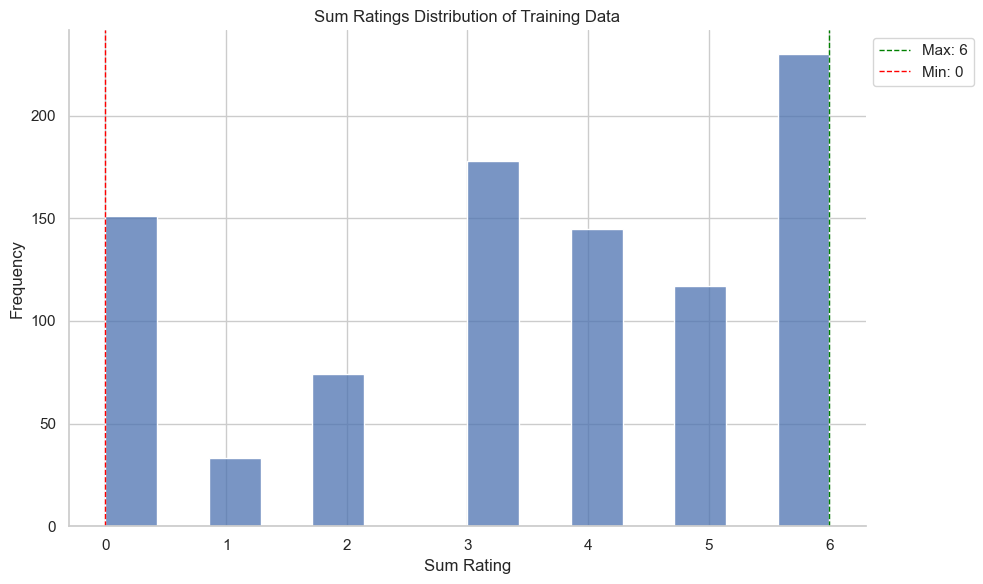

In [ ]:
# Train the algorithm on the trainset
algo.fit(data_train)

In [ ]:
# Calculate RMSE for training dataset
train_pred = algo.test(data_trainset)
accuracy.rmse(train_pred)

In [ ]:
# Calculate RMSE for test dataset
test_pred = algo.test(data_testset)
accuracy.rmse(test_pred)

,userID,drink_level,dress_preference,ambience,transport,marital_status,birth_year,interest,personality,budget,placeID,rating,food_rating,service_rating,sum_rating,name
851,U1027,social drinker,no preference,?,public,single,1989,retro,thrifty-protector,low,132951,1,1,1,3,VIPS
294,U1125,casual drinker,formal,friends,public,single,1990,technology,hard-worker,low,135076,1,1,1,3,Restaurante Pueblo Bonito
902,U1114,abstemious,no preference,family,on foot,single,1991,variety,hard-worker,medium,132834,0,0,0,0,Gorditas Doa Gloria
421,U1120,abstemious,informal,friends,public,single,1930,variety,hard-worker,low,132845,1,0,2,3,Cenaduria El Rincón de Tlaquepaque
390,U1024,abstemious,?,?,?,?,1930,none,hard-worker,medium,135060,1,0,2,3,Restaurante Marisco Sam


In [ ]:
# Show first 5 rows
train_data.head(5)

user: U1027      item: 132951     r_ui = None   est = 2.97   {'was_impossible': False}
user: U1027 item: VIPS r_ui = None est = 2.9710600903266537 {'was_impossible': False}
User U1027: Recommended Restaurant - Restaurant Las Mananitas, Estimated Score - 4.561093452440412
User U1125: Recommended Restaurant - Restaurant Las Mananitas, Estimated Score - 6
User U1114: Recommended Restaurant - Restaurant Las Mananitas, Estimated Score - 3.315195417502958
User U1120: Recommended Restaurant - Restaurant Las Mananitas, Estimated Score - 5.221641864479133
User U1024: Recommended Restaurant - Restaurant Las Mananitas, Estimated Score - 6
User U1098: Recommended Restaurant - Mariscos Tia Licha, Estimated Score - 6
User U1091: Recommended Restaurant - palomo tec, Estimated Score - 6
User U1099: Recommended Restaurant - Restaurante Marisco Sam, Estimated Score - 6
User U1012: Recommended Restaurant - Restaurant Las Mananitas, Estimated Score - 6
User U1049: Recommended Restaurant - Restaurant Las M

In [ ]:
# Get the item ID and name from the test data
item_id = train_data.iloc[0]['name']
item_name = train_data[train_data['name'] == item_id]['name'].iloc[0]  # Retrieve the name corresponding to the item ID

# Make a prediction using the item name
p1 = algo.predict(uid=train_data.iloc[0]['userID'], iid=item_id, verbose=True)

# Output the prediction with the item name
print(f"user: {p1.uid} item: {item_name} r_ui = None est = {p1.est} {p1.details}")

In [ ]:
# Create an empty dictionary to store top recommendations for each user
top_recommendations = {}

# Iterate through each unique user ID
for user_id in data['userID'].unique():
    # Predict ratings for all restaurants for the current user
    user_predictions = {}
    for item_id in data['placeID'].unique():
        prediction = algo.predict(uid=user_id, iid=item_id)
        user_predictions[item_id] = prediction.est

    # Sort predicted ratings in descending order
    sorted_predictions = sorted(user_predictions.items(), key=lambda x: x[1], reverse=True)

    # Get the top recommendation for the current user
    top_recommendation = sorted_predictions[0]

    # Get the name of the top recommended restaurant
    top_restaurant_name = place[place['placeID'] == top_recommendation[0]]['name'].iloc[0]

    # Store the top recommendation for the current user
    top_recommendations[user_id] = {'restaurant_name': top_restaurant_name, 'estimated_score': top_recommendation[1]}

# Print or display the top recommendations for each user
for user_id, recommendation in top_recommendations.items():
    print(f"User {user_id}: Recommended Restaurant - {recommendation['restaurant_name']}, Estimated Score - {recommendation['estimated_score']}")
